In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import scipy.fftpack
import scipy as sp
%matplotlib inline
sns.set()
from scipy.stats import norm
pd.options.mode.use_inf_as_na = True

### Importing the file cleaned in the outlier treament. 

In [2]:
df = pd.read_csv('C;/clean.csv',parse_dates=['date'])
df.head()

,Unnamed: 0,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,0,ahmednagar,bajri,2015,April,79.0,1406.0,1538.0,1463.0,2015-04-01,Ahmadnagar
1,1,ahmednagar,bajri,2016,April,106.0,1788.0,1925.0,1875.0,2016-04-01,Ahmadnagar
2,2,ahmednagar,wheat(husked),2015,April,1253.0,1572.0,1890.0,1731.0,2015-04-01,Ahmadnagar
3,3,ahmednagar,wheat(husked),2016,April,387.0,1750.0,2220.0,1999.0,2016-04-01,Ahmadnagar
4,4,ahmednagar,sorgum(jawar),2015,April,3825.0,1600.0,2200.0,1900.0,2015-04-01,Ahmadnagar


In [3]:
df.drop(['Unnamed: 0','district_name'],axis=1,inplace=True)
df.head()


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
0,ahmednagar,bajri,2015,April,79.0,1406.0,1538.0,1463.0,2015-04-01
1,ahmednagar,bajri,2016,April,106.0,1788.0,1925.0,1875.0,2016-04-01
2,ahmednagar,wheat(husked),2015,April,1253.0,1572.0,1890.0,1731.0,2015-04-01
3,ahmednagar,wheat(husked),2016,April,387.0,1750.0,2220.0,1999.0,2016-04-01
4,ahmednagar,sorgum(jawar),2015,April,3825.0,1600.0,2200.0,1900.0,2015-04-01


### Attempt is to analyse the news reported in 2015, shown below:
### <img src = 'files/news_price_rise.png'>

In [4]:
onion = df[df['Commodity']=='onion']
onion.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
31,ahmednagar,onion,2015,April,186700.0,114.0,1459.0,797.0,2015-04-01
32,ahmednagar,onion,2016,April,42342.0,100.0,938.0,538.0,2016-04-01
61,akole,onion,2015,April,105645.0,106.0,1389.0,849.0,2015-04-01
62,akole,onion,2016,April,56372.0,150.0,973.0,662.0,2016-04-01
74,jamkhed,onion,2015,April,5232.0,106.0,1469.0,788.0,2015-04-01


In [5]:
trendline = pd.pivot_table(onion,index='Commodity',columns=['date'],aggfunc='mean')

In [6]:
trendline['modal_price'].head()

date,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,...,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00
Commodity,,,,,,,,,,,,,,,,,,,,,
onion,1357.163934,1384.762712,1305.491228,1361.293103,1165.032258,1296.37931,1129.017857,960.333333,1096.75,1490.153846,...,847.037975,711.730769,663.6875,626.369048,709.666667,716.97561,645.628205,526.60274,600.697368,771.25


###  Generating the trendline pivot table to get monthly trendline for any onion

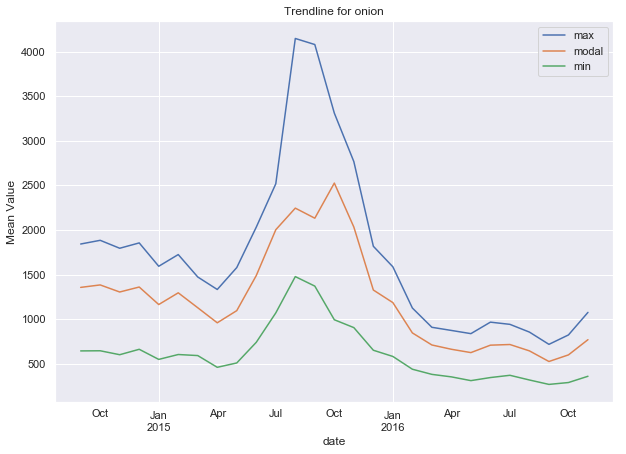

In [7]:
plt.figure(figsize=(10,7))

trendline['max_price'].loc['onion'].plot()
trendline['modal_price'].loc['onion'].plot()
trendline['min_price'].loc['onion'].plot()
plt.title('Trendline for onion')
plt.ylabel('Mean Value')
plt.legend(['max','modal','min','modal_scatter'])



Text(0, 0.5, 'Modal Prices')

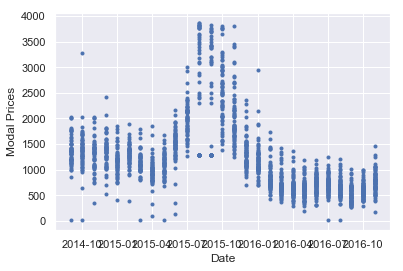

In [8]:
plt.plot(onion['date'],onion['modal_price'],'.')
plt.xlabel('Date')
plt.ylabel('Modal Prices')

### Assuming multiplicative seasonality, dividing the modal_prices with moving average

In [9]:
trends = trendline['modal_price'].loc['onion']
temp_ = pd.DataFrame({'date':trends.index.values,'mean_modal':trends.values})

In [10]:
onion = onion.merge(temp_,on='date')

In [11]:
onion.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,mean_modal
0,ahmednagar,onion,2015,April,186700.0,114.0,1459.0,797.0,2015-04-01,960.333333
1,akole,onion,2015,April,105645.0,106.0,1389.0,849.0,2015-04-01,960.333333
2,jamkhed,onion,2015,April,5232.0,106.0,1469.0,788.0,2015-04-01,960.333333
3,kopargaon,onion,2015,April,34179.0,395.0,1350.0,988.0,2015-04-01,960.333333
4,newasa-ghodegaon,onion,2015,April,186038.0,285.0,1342.0,977.0,2015-04-01,960.333333


In [12]:
onion['residuals']=onion['modal_price']/onion['mean_modal']

Text(0, 0.5, 'Residuals')

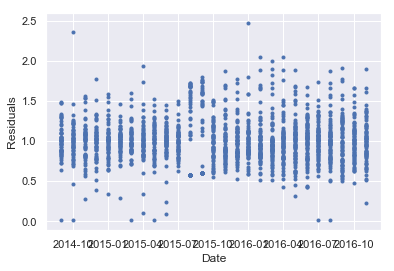

In [13]:
plt.plot(onion['date'],onion['residuals'],'.')
plt.xlabel('Date')
plt.ylabel('Residuals')

### The data was earlier arranged in a sequential manner and therefore, we can use dummy date variable to perform regression.

In [14]:
dummy_dates = np.arange(0,len(trends.index.values))

C:\Users\vipul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


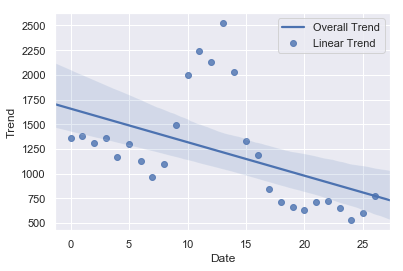

In [15]:
sns.regplot(dummy_dates,trends,'->')
plt.ylabel('Trend')
plt.xlabel('Date')
plt.legend(['Overall Trend','Linear Trend'])

### If the linear trend is removed, then the residuals of the linear regression would correspond to the seasonal effects plus noise or random residuals

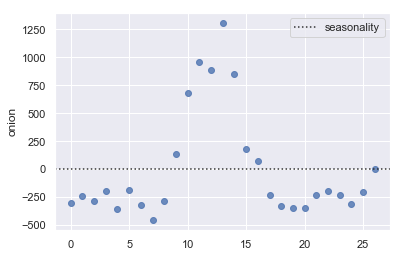

In [16]:
sns.residplot(dummy_dates,trends)
plt.legend(['seasonality'])

In [17]:
def line(x,a,m): return(a+np.multiply(x,m))

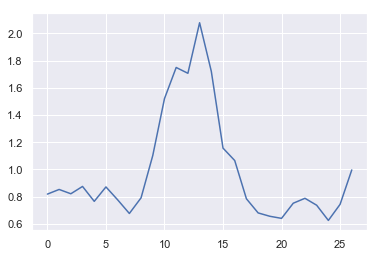

In [18]:
popt,pcov = sp.optimize.curve_fit(line,dummy_dates,trends)
seasonality = trends/line(dummy_dates,*popt)
plt.plot(dummy_dates,seasonality)

In [19]:
def f(x,a,b,mu,sigma):
    return a * np.exp(-(x-mu)**2/(2.0*sigma*sigma))+b
def f2(x,a,b,mu,sigma):
    return a*np.sinc((x-mu)/2.0*sigma)+b


In [20]:
popt,pcov = sp.optimize.curve_fit(f,dummy_dates,seasonality,[2.0,0.8,12,5])

Text(0.5, 1.0, 'mu: 12.35475114607745 sigma: 2.033438401446955')

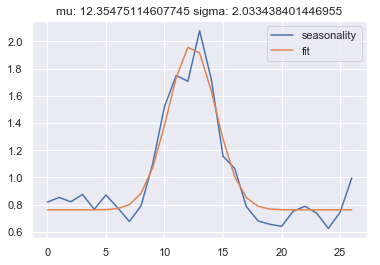

In [21]:
plt.plot(dummy_dates,seasonality)
plt.plot(dummy_dates,f(dummy_dates,*popt))
plt.legend(['seasonality','fit'])
plt.title('mu: '+str(popt[2])+' sigma: '+str(popt[3]))

### Above analysis shows an important result. the signal strength is placed at $\mu$=12.35 and $\sigma = $ 2.0 which means that the seasonal strength is repeated every 12 months (the fourier analysis assumes that the pattern is repititive ). The effect of this price rise is felt by the market for about 2.355*2 months. 

In [22]:
onion.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,mean_modal,residuals
0,ahmednagar,onion,2015,April,186700.0,114.0,1459.0,797.0,2015-04-01,960.333333,0.829920
1,akole,onion,2015,April,105645.0,106.0,1389.0,849.0,2015-04-01,960.333333,0.884068
2,jamkhed,onion,2015,April,5232.0,106.0,1469.0,788.0,2015-04-01,960.333333,0.820548
3,kopargaon,onion,2015,April,34179.0,395.0,1350.0,988.0,2015-04-01,960.333333,1.028809
4,newasa-ghodegaon,onion,2015,April,186038.0,285.0,1342.0,977.0,2015-04-01,960.333333,1.017355


### If the multiplicative model is correct, then I must be able to reduce the dataset into a nice additive model by taking log of the data and using $log(f(t))=log(Tr(t)*S(t)*Res(t))=log(Tr(t))+log(S(t))+log(Res(t))$

In [23]:
log_onion = pd.DataFrame({'date':onion['date'],'log_price':np.log1p(onion['modal_price'])})

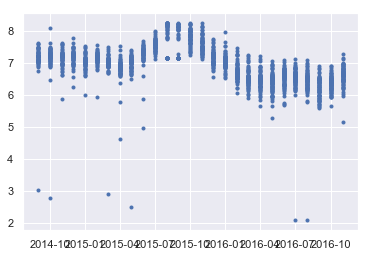

In [24]:
plt.plot(onion['date'],log_onion['log_price'],'.')

In [25]:
trendline_log = log_onion.groupby(by='date').describe()

In [26]:
trendline_log.head()

log_price                                                    \
               count      mean       std       min       25%       50%   
date                                                                     
2014-09-01      61.0  7.144607  0.564689  3.044522  7.080868  7.209340   
2014-10-01      59.0  7.149514  0.621215  2.772589  7.109059  7.232733   
2014-11-01      57.0  7.140287  0.283527  5.880533  6.988413  7.200425   
2014-12-01      58.0  7.188768  0.247685  6.259581  7.092989  7.227298   
2015-01-01      62.0  7.034751  0.242082  5.993961  6.945992  7.069449   

                                
                 75%       max  
date                            
2014-09-01  7.311218  7.613325  
2014-10-01  7.334632  8.092851  
2014-11-01  7.279319  7.617760  
2014-12-01  7.316712  7.791936  
2015-01-01  7.149123  7.520235

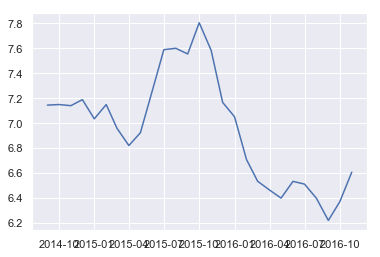

In [27]:
plt.plot(trendline_log.index.values,trendline_log['log_price']['mean'])


In [28]:
popt,pcov = sp.optimize.curve_fit(line,dummy_dates,trendline_log['log_price']['mean'])

In [29]:
linear_trend = line(dummy_dates,*popt)

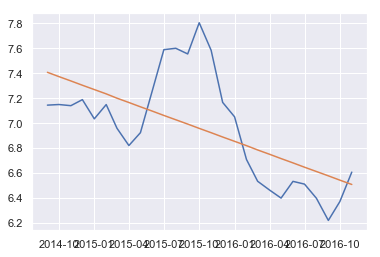

In [30]:
plt.plot(trendline_log.index.values,trendline_log['log_price']['mean'])
plt.plot(trendline_log.index.values,linear_trend)

In [31]:
seasonal_component = (trendline_log['log_price']['mean']).tolist() / linear_trend

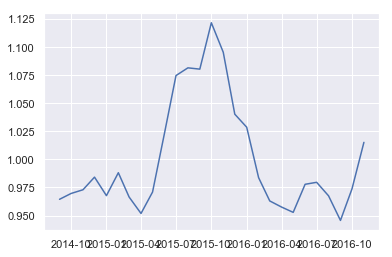

In [32]:
plt.plot(trendline_log.index.values,seasonal_component)

In [33]:
temp_ = pd.DataFrame({'date':trendline_log.index.tolist(),'Seasonal':seasonality})
temp_.head()

,date,Seasonal
date,,
2014-09-01,2014-09-01,0.818887
2014-10-01,2014-10-01,0.853028
2014-11-01,2014-11-01,0.821389
2014-12-01,2014-12-01,0.875209
2015-01-01,2015-01-01,0.765757


### Now, generating the deseasonalised data by $f(t)/S(t)$

In [34]:
deseasonal_modal = onion.merge(temp_,on='date')

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [35]:

deseasonal_data = pd.DataFrame({'date':onion['date'],'modal_price:':onion['modal_price']/deseasonal_modal['Seasonal']})

In [36]:
popt,pcov=sp.optimize.curve_fit(line,dummy_dates,trendline['modal_price'].loc['onion'].tolist())

In [37]:
linear_trend_=line(dummy_dates,*popt)

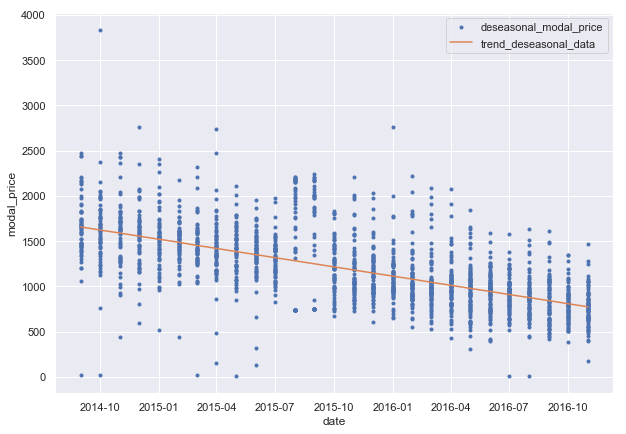

In [38]:
plt.figure(figsize=(10,7))
#linear_trend = trendline['modal_price']
plt.plot(deseasonal_data['date'],deseasonal_data['modal_price:'],'.')
plt.plot(trendline_log.index.values,linear_trend_)
plt.xlabel('date')
plt.ylabel('modal_price')
plt.legend(['deseasonal_modal_price','trend_deseasonal_data'])

In [39]:
temp_ = pd.DataFrame({'date':trendline_log.index.values,'trend_line':linear_trend_})

In [40]:
deseasonal_data=deseasonal_data.merge(temp_,on='date')

In [41]:
deseasonal_data.head()

,date,modal_price:,trend_line
0,2015-04-01,1178.053016,1419.477515
1,2015-04-01,1254.914693,1419.477515
2,2015-04-01,1164.750033,1419.477515
3,2015-04-01,1460.371869,1419.477515
4,2015-04-01,1444.112668,1419.477515


In [42]:
deseasonal_data['residuals']=deseasonal_data['modal_price:']/deseasonal_data['trend_line']

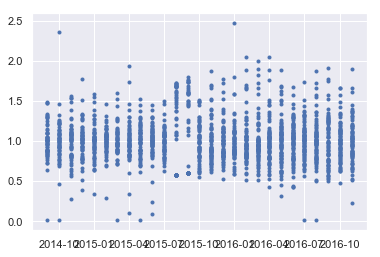

In [43]:
plt.plot(deseasonal_data['date'],deseasonal_data['residuals'],'.')

### taking fourier transform to see if there is any periodic effect left

In [44]:
resid = deseasonal_data['residuals']**2

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\vipul\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

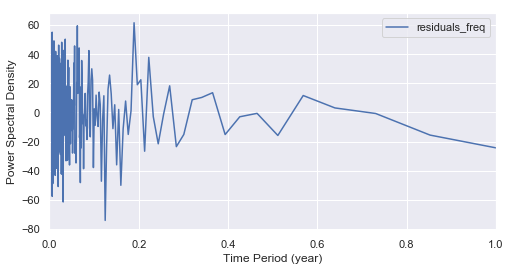

In [45]:
plt.figure(figsize=(10,7))
price_fft = sp.fftpack.fft(resid)
fftfreq = sp.fftpack.fftfreq(len(resid),1/365)
time_ = 1/fftfreq
i = fftfreq > 0
plt.figure(figsize=(10,7))
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(time_[i], price_fft[i])
plt.xlim(0,1)
ax.set_xlabel('Time Period (year)')
ax.set_ylabel('Power Spectral Density')
plt.legend(['residuals_freq'])

#### <font color = red> Questions to self: <br /> 1. the data showed a huge price rise in time-period near October 2015. With global climate change, unseasonal rains and unpredictable weather patterns are on the rise. So, if the data is considered for modelling and predicting, then will it be correct to assume that this pattern might be repeated (if not intervened with better preparedness)? <br /> 2. If intervened, then how to go about modelling the intervention?<br /> 3. The time-period was from 2014-2016. If similar data is available for 2016-2018, how about using this data as training and  validation  use the external data for testing?<br /> 4. Is it justifiable to use the same detrending and deseasonalising method for all commodities? possibility of an exponential term? or may be a random walk?</font>

In [104]:
onion_yearly = pd.pivot_table(onion.drop('date',axis=1),index='Year',aggfunc='mean')

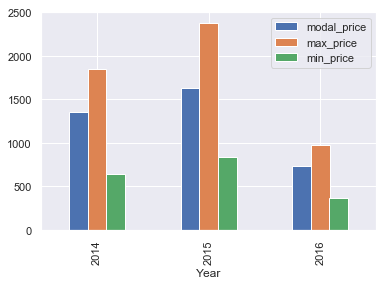

In [166]:
onion_yearly[['modal_price','max_price','min_price']].plot.bar()


### Auto-Correlation Plots

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


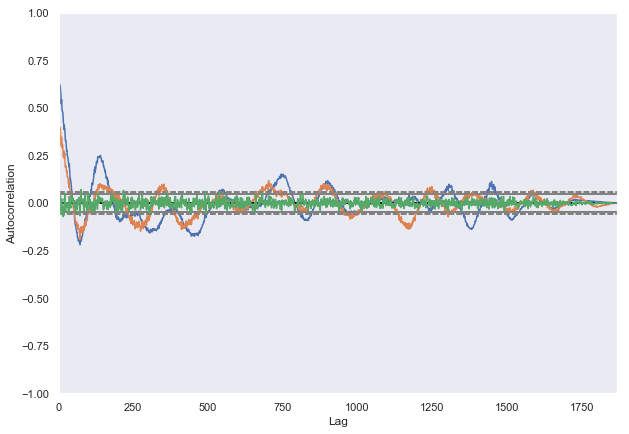

In [201]:
plt.figure(figsize=(10,7))
groups = onion.groupby(['APMC'])
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(onion['modal_price']) # blue
autocorrelation_plot(deseasonal_data['modal_price:']) # orange
autocorrelation_plot(deseasonal_data['residuals']) # green

### the above plot shows that the deseasonalised residuals behave like white noise.